#### Tweet Analysis

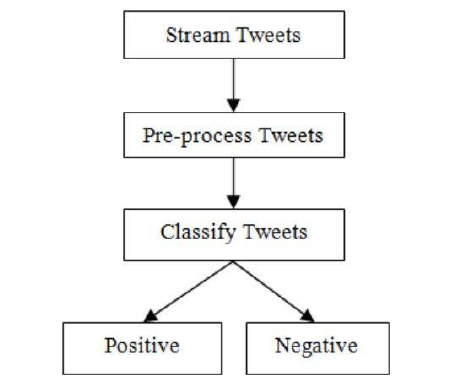

In [1]:
# Loading necessary modules
import pandas as pd              # data processing; csv file i/o (pd.read_csv)
import numpy as np               # linear algebra
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv(r'C:\ProgramData\Anaconda3\Scripts\project work 6th sem\tweet_final.csv')
df_without_preprocess = df
df2 = df

In [3]:
# Dimensions of dataset
print(df2.shape)
cnt = 0
rem=[]
for i in range(df2.shape[0] - 1, -1, -1):
    if cnt > 9000 :
        break
    #if i%1000 == 0:
        #print(df.iloc[i,2])
    if df2.iloc[i,2] == "Positive":
        #df = df.drop(df.index[[i]])
        rem.append(i)
        cnt+=1
df2 = df2.drop(df.index[rem])
print(df2.shape)


(11440, 3)
(2439, 3)


In [4]:
# A Look at the Dataset : First 5 rows ; Last 5 rows
df.head()

,Id,Content,Sentiment
0,49640624.0,the end,Negative
1,43505275.0,god over everything,Negative
2,43505275.0,i m sorry,Negative
3,43505275.0,god please forgive me,Negative
4,43505275.0,this day couldn t get any worse,Negative


In [5]:
df.tail()

,Id,Content,Sentiment
11435,9.550000e+17,b rt at_user sometimes you need to take a brea...,Positive
11436,9.550000e+17,b rt at_user the best relationship is when you...,Positive
11437,9.550000e+17,b niggas love venting on black snapchat screen...,Positive
11438,9.550000e+17,b rt at_user to my wifey for lifey i love you ...,Positive
11439,9.550000e+17,b rt at_user hope you x99re resting up well at...,Positive


In [6]:
# Data types
df.dtypes

Id           float64
Content       object
Sentiment     object
dtype: object

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11440 entries, 0 to 11439
Data columns (total 3 columns):
Id           11440 non-null float64
Content      11440 non-null object
Sentiment    11440 non-null object
dtypes: float64(1), object(2)
memory usage: 268.2+ KB


In [8]:
df.isnull().sum()        # no. of missing values in each column ; no missing value found

Id           0
Content      0
Sentiment    0
dtype: int64

## Preprocess Tweets

### Before we start building the analyzer, we first need to remove noise and preprocess tweets by using the following steps:

* Lower Case - Convert the tweets to lower case.
* URLs - Eliminate all of these URLs via regular expression matching or replace with generic word URL.
* @username - Remove "@username" via regex matching or replace it with generic word AT_USER.
* #hashtag - replace hashtags with the exact same word without the hash (hash tags may provide some useful information), e.g. #boycottUnitedAirlines replaced with ' boycottUnitedAirlines '.
* Punctuations and additional white spaces - remove punctuation at the start and ending of the tweets, e.g: ' the day is beautiful! ' replaced with 'the day is beautiful'. We also replace multiple whitespaces with a single whitespace.

In [9]:
###Preprocess tweets
def processTweet2(tweet):
    # process the tweets

    #Convert to lower case
    tweet = tweet.lower()
    tweet.lower()
    #convert any url to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
    #Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Remove :( or :)
    tweet = tweet.replace(':)','')
    tweet = tweet.replace(':(','')
    #trim
    tweet = tweet.strip('\'"')
    re.sub('[^A-Za-z0-9]+', '', tweet)
    replaceTwoOrMore(tweet)
    return tweet    

###get stopword list
def getStopWordList(stopWordListFileName):
    #read the stopwords file and build a list
    stopWords = []
    stopWords.append('at_user')
    stopWords.append('url')

    fp = open(stopWordListFileName, 'r')
    line = fp.readline()
    while line:
        word = line.strip()
        stopWords.append(word)
        line = fp.readline()
    fp.close()
    return stopWords



def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)
#end

In [10]:
stopWords = []

st = open('stopwords.txt', 'r')
stopWords = getStopWordList('stopwords.txt')
stopWords

['at_user',
 'url',
 'a',
 'at_user',
 'rt',
 'am',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'enough',
 'even',
 'evenly',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everything',


In [11]:
import re
import csv
import os

In [12]:
'''for filename in os.listdir(r'C:\ProgramData\Anaconda3\Scripts\project work 6th sem\DATASET\NEGATIVE') :
    print(filename)
    
    addr = os.getcwd() + '\\DATASET\\NEGATIVE\\' + filename
    print(addr)
    mydf = pd.read_csv(addr)
    nul = mydf.isnull().sum().sum()
    #if problem in counting null values
    #nul = 0
    
    #print(nul)
    for i in range(len(mydf.index) - nul) :
        tweet=mydf.iloc[i,1]
        mydf.iloc[i,1] = processTweet2(tweet)
    addr2 = addr[:len(addr)-4] + '_final' + addr[len(addr)-4:]
    print(addr2)
    myFile = open(addr2, 'w', newline='')
    with myFile:
        writer = csv.writer(myFile)
        for i in range(len(mydf.index) - nul) :
            writer.writerow(mydf.ix[i])
     
    #print("Writing complete")
   
    



for i in range(0,200):
    tweet=df.iloc[i,1]
    df.iloc[i,1]=processTweet2(tweet)  
   ''' 

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 90-91: malformed \N character escape (<ipython-input-12-b8db556dfe86>, line 32)

In [13]:
df.head()

,Id,Content,Sentiment
0,49640624.0,the end,Negative
1,43505275.0,god over everything,Negative
2,43505275.0,i m sorry,Negative
3,43505275.0,god please forgive me,Negative
4,43505275.0,this day couldn t get any worse,Negative


In [14]:
def getFeatureVector(tweet):
    features = []

    words = tweet.split()
    for w in words:

        w = replaceTwoOrMore(w)

        #strip digits
        w = w.strip('0123456789')

        #strip punctuation
        w = w.strip('\'"!?,.')

        if (w == ""):
            continue
        elif(w in stopWords):
            #print w
            continue
        else:
            features.append(w.lower())

    return features
#end

In [15]:
for i in range(0,df.shape[0]):
    tweet=df.iloc[i,1]
    a=getFeatureVector(tweet)
    df.iloc[i,1] = " ".join(a)
    print(a)
    

['end']
['god']
['sorry']
['god', 'please', 'forgive']
['day', 'couldn', 'worse']
['delete', 'twitter']
['at_user', 'depression', 'die']
['at_user', 'fucking', 'die', 'sometimes']
['at_user', 'die']
['at_user', 'people', 'twitter', 'tweets', 'saying', 'die', 'repeatedly', 'url']
['at_user', 'struggling', 'depression', 'mom', 'died', 'stage', 'brain', 'cancer', 'hard']
['family', 'probably']
['family']
['im', 'starting', 'family', 'ultimately', 'fuckup', 'moreharmthangood']
['url', 'jaggoff', 'performs', 'exorcisms', 'skype', 'power', 'christ', 'compels', 'at_user', 'at_user', 'at_user']
['write', 'lesson', 'plan', 'gonna', 'kill']
['at_user', 'wow', 'jaggoff', 'drink', 'budlight', 'grip', 'leave', 'parents', 'talk', 'yo', 'mama']
['at_user', 'at_user', 'judging', 'jumping', 'prone', 'techniques', 'looks', 'ied', 'height', 'jump', 'prone', 'die']
['family']
['at_user', 'indirect', 'tweets', 'cowardly', 'tweet', 'direct', 'indirect', 'indirectly', 'courageously']
['at_user', 'indirect', 

['at_user', 'at_user', 'world', 'path', 'celebrating', 'matri', 'pitri', 'pujan', 'diwas', 'started', 'bapuji', 'serviceforhumanity']
['at_user', 'congratulations', 'at_user', 'taking', 'asia', 'regional', 'finals', 'title', 'thanks', 'at_user', 'giving']
['at_user', 'wins', 'weeks', 'congratulations', 'at_user', 'machine']
['at_user', 'at_user', 'girl', 'wanna', 'look', 'good', 'pregnant', 'lol', 'congratulations', 'beautiful', 'hope', 'girl']
['at_user', 'wins', 'weeks', 'congratulations', 'at_user', 'machine']
['at_user', 'congratulations', 'gorb', 'graduating', 'middle', 'school', 'hope', 'strive', 'greatness', 'cod']
['at_user', 'congratulations', 'india', 'beating', 'pakistan', 'asiacup', 'indvpak', 'thank', 'advance', 'diwali', 'gift', 'at_user']
['congratulations', 'jim', 'editor', 'media', 'artist']
['congratulations', 'john', 'creepy', 'actor', 'sweet', 'actor']
['at_user', 'driven', 'suicide', 'especially', 'cared']
['at_user', 'feeling', 'day', 'meet', 'john', 'stockton', '

['gotten', 'affection', 'major', 'news', 'network', 'x99d', 'call', 'corrupt']
['idrfk', 'brother', 'dead', 'ass', 'wasted', 'trying', 'overly', 'dramatize', 'front', 'girlfriend']
['youre', 'unhappy', 'relationship', 'break', 'dont', 'youre', 'literally', 'considering']
['yelling', 'affection']
['dude', 'rolls', 'eyes', 'scoffs', 'yells', 'sarcastically', 'oh', 'nice', 'shakes', 'head', 'til', 'stop']
['mention', 'subject', 'movie', 'bo', 'sur']
['feel', 'affection', 'wanna', 'person', 'bc', 'rn']
['meinmychildhood', 'nreceive', 'gr', 'luv', 'affection', 'family', 'membrz']
['dogs', 'affection', 'humans', 'lived', 'dogs', 'sometimes', 'misread', 'canine', 'language']
['care', 'jealous', 'demand', 'affection', 'wan', 'youu', 'ahuhuhuhuu', 'pero', 'joke', 'ra']
['dont', 'reciprocate', 'affection', 'significant', 'don', 'x99t', 'deserve']
['dont', 'expresses', 'affection', 'raw', 'powerfully', 'babys', 'names', 'tweets']
['affection', 'women']
['mention', 'subject', 'movie', 'bo', 'sur']

['trynna', 'catch', 'love', 'affection']
['deserve', 'doesn', 'compete', 'affection', 'guessing', 'st']
['don', 'x99t', 'relationship', 'rn', 'genuinely', 'miss', 'affection', 'geeking', 'feel']
['attention', 'affection']
['hmu', 'ur', 'ur', 'bs', 'amp', 'ready', 'luv', 'affection', 'lil', 'bitch']
['strengthen', 'inner', 'values', 'contentment', 'patience', 'tolerance', 'compassion', 'keeping']
['chase', 'love', 'affection', 'attention', 'x99t', 'freely', 'person', 'x99t', 'worth']
['deepthroat', 'fuckin', 'affection', 'bro']
['wasn', 'salman', 'khan', 'fan', 'earlier', 'nbut', 'watching']
['yall', 'dont', 'love', 'yall', 'temporary', 'rush', 'affection', 'heart', 'cant']
['devilman', 'unlike', 'animes', 'tackles', 'parental', 'family', 'issues', 'portrays', 'longing', 'affec']
['deepthroat', 'fuckin', 'affection', 'bro']
['affection', 'embarrassed']
['celeste', 'relationship', 'husband', 'twisted', 'bit', 'abuse', 'sex', 'insecuri']
['believe', 'moment', 'happened', 'jk', 'protect', 

['world', 'replace', 'love', 'affection', 'belief', 'wishers', 'blessed', 'grat']
['affection', 'misty', 'chan']
['don', 'x99t', 'relationship', 'rn', 'genuinely', 'miss', 'affection', 'geeking', 'feel']
['demanded', 'affection', 'bit', 'head', 'stag', 'glided']
['protect', 'love', 'shower', 'affection']
['yes', 'time', 'cause', 'x99m', 'doing', 'please', 'don', 'x99t', 'talk', 'cause']
['virgo', 'zodiacpeople', 'try', 'public', 'affection', 'virgo', 'woman', 'minimum']
['woman', 'lot', 'affection', 'shit', 'smiling', 'lookin']
['love', 'affection', 'truly', 'exist', 'expression', 'suffer', 'x98touch', 'hunger', 'riddell', 'ht']
['ur', 'love', 'amp', 'affection', 'reciprocated', 'possibly', 'exceeded', 'deadass', 'feeling']
['little', 'pot', 'head', 'princess', 'gotta', 'hit', 'blunt', 'fucking', 'damn', 'tha']
['x99s', 'women', 'don', 'x99t', 'money', 'materialistic', 'bu']
['gotcha', 'bitch', 'x99s', 'love', 'affection']
['breakfast', 'boyfriend', 'love', 'affection', 'mm']
['public'

['love', 'affection', 'special']
['affection']
['az', 'mesa', 'mcacceast', 'x98urgent', 'senior', 'bambi', 'yo', 'girl', 'super', 'sweet', 'adores', 'love', 'amp', 'affection', 'longing', 'warm', 'home', 'pl']
['evidence', 'love', 'amp', 'adoration', 'lukey', 'eyes', 'stares', 'uncontrolla']
['tx', 'pasadena', 'x98still', 'lana', 'mo', 'skinny', 'super', 'loving', 'girl', 'pls', 'watch', 'xbcshe', 'x99s', 'adorable', 'longs', 'love', 'amp', 'affection', 'amp']
['im', 'gonna', 'stop', 'talking', 'look', 'sana', 'shes', 'adorable', 'wanna', 'squish', 'cheeks']
['hmu', 'tryna', 'eat', 'movie', 'valentine', 'x99s', 'day', 'ain', 'x99t', 'fucking', 'cause', 'x99m', 'celibate', 'mysel']
['psst', 'nyou', 'don', 'feel', 'bad', 'receiving', 'positive', 'affection', 'deserve']
['pence', 'x9cthe', 'people', 'united', 'held', 'special', 'affection', 'admiration', 'people']
['love', 'wiring', 'brain', 'means', 'trouble', 'focusing', 'object', 'affection']
['sort', 'convinced', 'x99d', 'ok', 'affect

[]
['women', 'x98s', 'day', 'celebrations']
['starting', 'morning', 'groundhogday', 'celebrations']
['announced', 'start', 'dcuo', 'teases', 'episode', 'deluge', 'superman', 'th', 'anniversary', 'celebrations', 'x89url']
['smiles', 'handshakes', 'hugs', 'abounded', 'tulita', 'celebrations', 'canol', 'trail', 'wire', 'cleanup', 'thanks', 'involved']
['watch', 'glimpses', 'rashtrapati', 'bhavan', 'divas', 'celebrations', 'ani', 'news', 'via']
['celebrations', 'blackhistorymonth', 'tend', 'note', 'supposed', 'black', 'folks']
['gala', 'celebrations', 'clarke', 'hotel', 'yay', 'free', 'dinner', 'helped', 'st', 'joes', 'medical', 'clinic', 'raise', 'dollars']
['sam', 'clucas', 'robbie', 'fowler', 'gazza', 'run', 'top', 'footballing', 'stars', 'goal', 'celebrations', 'landed', 'th']
['love', 'birthdays', 'especially', 'x99re', 'mine', 'thanks', 'birthday', 'love', 'day', 'birthdaygi']
['hope', 'sweet', 'february', 'market', 'times', 'valentine', 'day', 'visit']
['warms', 'heart']
['looking',

['coping', 'loss', 'hard', 'elephants', 'dswt', 'keepers', 'play', 'crucial', 'role', 'helping', 'orphans', 'diff']
['liked', 'grief']
['lol', 'good', 'grief', 'x99d', 'hate', 'ass', 'lady', 'club', 'ppl', 'age', 'talking', 'laughing']
['hard', 'ignore', 'trump', 'leveraged', 'north', 'korean', 'refugee', 'grief', 'political', 'gain', 'minutes', 'demonizing', 'minors', 'wh']
['heartbreaking', 'meet', 'ankit', 'x99s', 'parents', 'grief', 'stricken', 'totally', 'anguished', 'talibanism', 'delhi', 'hav']
['af', 'good', 'grief']
['maple', 'grief', 'iconic', 'symbol', 'causes', 'copyright', 'clash']
['grief', 'friend']
['amp', 'killing', 'portrayal', 'grief', 'gh']
['x9cfatal', 'consequences', 'sounds', 'esoteric', 'unclear', 'mean', 'drinking', 'methylated', 'spirits', 'shut']
['support', 'father', 'daughters', 'abused', 'nassar', 'feel', 'grief', 'happened', 'children', 'justice']
['good', 'grief']
['fantastic', 'woman', 'theaters', 'weekend', 'worth', 'time']
['kicked', 'griefing', 'didn

['anonymous', 'apps', 'sites', 'propel', 'cyberbullying', 'schools']
['hate', 'speech', 'amp', 'cyberbullying', 'help', 'students', 'curious', 'understanding', 'condoning', 'htt']
['graphic', 'brutal', 'torture', 'murder', 'video', 'ok', 'nhate', 'speech', 'authorized', 'ok', 'ncyberbullying', 'trolling']
['plano', 'east', 'school', 'administrators', 'plan', 'punish', 'students', 'involved', 'incident', 'student', 'bullied']
['rise', 'technology', 'brought', 'rise', 'cyberbullying', 'shares']
['highlight', 'check', 'favorite', 'songs', 'human', 'condition', 'exclusive', 'blog', 'post', 'stop']
['decoding', 'internet', 'social', 'media', 'nurl', 'bullying']
['thank', 'paying', 'attention', 'performers', 'voices', 'amp', 'caring', 'cyberbullying']
['thank', 'paying', 'attention', 'performers', 'voices', 'amp', 'caring', 'cyberbully']
['plano', 'east', 'school', 'administrators', 'plan', 'punish', 'students', 'involved', 'incident', 'student', 'bullied']
['national', 'nooneeatsaloneday', 

['memo', 'lay', 'bare', 'systemic', 'pattern', 'abuse', 'fbi', 'amp', 'doj', 'confirmed', 'worst', 'fear', 'america', 'x99s', 'fr']
['gay', 'crowd', 'lgbt', 'community', 'lesbians', 'bisexual', 'trans', 'people']
['memo', 'lay', 'bare', 'systemic', 'pattern', 'abuse', 'fbi', 'amp', 'doj', 'confirmed', 'worst', 'fear', 'america', 'x99s', 'fr']
['syrian', 'refugees', 'express', 'confusion', 'turkey', 'operation', 'syria', 'caught', 'fear', 'hope']
['fear', 'dismayed', 'god', 'strengthen', 'help']
['sounds', 'memo', 'fat', 'nothingburger', 'trump', 'officials', 'fear', 'fbi', 'smear', 'memo', 'embarra']
['struck', 'fear', 'anger', 'hearts', 'ho', 'twitter', 'people']
['sad', 'sign', 'times', 'britain', 'developed', 'climate', 'political']
['th', 'school', 'shooting', 'days', 'dad', 'parent', 'fear', 'sending', 'kids', 'sc']
['hear', 'democrats', 'deny', 'rebut', 'specified', 'fisamemo', 'confuse', 'pretend', 'unde']
['kfnkfjfn', 'gif', 'seungcheol', 'scared', 'fireworks', 'jin', 'beside']

['glad', 'spot', 'awful', 'photos', 'internet', 'difficult']
['kinda', 'glad', 'stopped', 'thinking', 'hoe', 'mind', 'finna', 'stay', 'past']
['excellent', 'pleased', 'positive', 'changes', 'life', 'glad', 'look']
['hi', 'help', 'writing', 'nof', 'mlm', 'letters']
['x99d', 'x99re', 'supporting', 'comey', 'nalso', 'x99m', 'glad', 'admit', 'trump', 'wi']
['marriedtomedicine', 'wow', 'rude', 'hell', 'dr', 'heavenly', 'talking', 'glad', 'simone', 'checked']
['x99m', 'glad', 'don', 'x99t', 'hillary', 'xb']
['glad', 'sorry', 'hear', 'emergency', 'visit', 'don', 'personally']
['bisexual', 'family', 'glad', 'support', 'lgbtproud']
['glad', 'boys', 'town']
['mouth', 'demon', 'comeback', 'closed']
['awesome', 'dry', 'earth', 'rest', 'walk', 'actually', 'beli']
['glad', 'x99s', 'suspended', 'th']
['ms', 'phipps', 'class', 'san', 'lucas', 'elementary', 'school', 'wrote', 'illustrated', 'book', 'x99s', 'published', 'glad', 'strategy', 'ext']
['istaypositiveby', 'tweeting', 'nby', 'familiar', 'usa',

['taxes', 'beer', 'time', 'happy', 'friday']
['kyukyuu', 'happy', 'happy', 'birthday', 'bet', 'doing', 'army', 'cos']
['normal', 'platitudes', 'violence', 'retaliation', 'x99t', 'answer', 'lot', 'parents', 'larry', 'nassar', 'x99s', 'victims']
['happy', 'weddingday', 'youngbae']
['im', 'happy', 'kayla', 'bringit']
['happy', 'friday', 'friends', 'start', 'day', 'smile', 'chihuahuas', 'chihuahuas', 'dogtweet', 'dogtalk', 'dogsoftwitter', 'friy']
['stylish', 'nat_user', 'nhappy', 'morning', 'babiee']
['wake', 'morning', 'wonderful', 'happen', 'choose', 'positive', 'ha']
['gif', 'makes', 'happy']
['good', 'morning', 'nhappy', 'weekend']
['happybirthdaysamcollins', 'nwow', 'happy', 'birthday', 'sam', 'ive', 'supporting', 'time', 'beyond', 'proud']
['happy', 'bday', 'xef', 'happy_peanut_day']
['wedding', 'day', 'ndear', 'taeyang', 'dear', 'min', 'hyorin', 'nwe', 'wish', 'beautiful', 'wonderful', 'amazing', 'amp', 'happy', 'day']
['happy', 'birthday', 'danny', 'hope', 'awesome']
['day', 'ni',

['mir', 'hazr', 'kh', 'death', 'sometime', 'feels', 'helpless', 'uhave', 'stil', 'feel', 'fedup', 'life', 'pray', 'su']
['yes', 'scary', 'shit', 'call', 'moc', 'send', 'faxes', 'email']
['takes', 'lot', 'cry', 'cry', 'means', 'care', 'amp', 'x99ve']
['democrats', 'congress', 'voice', 'heard', 'approve']
['hunk', 'life', 'based', 'true', 'story', 'pidge', 'literally', 'wore', 'exact', 'outfit']
['scarier', 'bcz', 'happening', 'country', 'pillar']
['women', 'helpless', 'nall', 'lessons', 'self', 'defense', 'al', 'qaeda', 'amp', 'grey', 'wolf', 'terrorists', 'invading', 'vi']
['wandering', 'worlds', 'dead', 'helpless', 'born', 'rest', 'head']
['communist', 'genocide', 'soviet', 'union', 'jewish', 'bolsheviks', 'murder', 'million', 'russia', 'amp', 'ukraine', 'nthe', 'jews', 'free']
['hello', 'feeling', 'impatient', 'try', 'special', 'dark', 'green', 'eyelash', 'bacon', 'nectarine', 'feel', 'helpless']
['evn', 'widow', 'volunteers', 'burn', 'husband', 'funeral', 'pyre', 'claimed', 'fictiti

['play', 'game', 'league', 'game', 'melee', 'hey', 'good', 'nhow', 'qua']
['grandma', 'dies', 'kill']
['spitefully', 'kill', 'assignment', 'im', 'literally', 'ragee']
['tryinegativeg', 'share', 'beautiful', 'momenegativets', 'anegatived', 'idk', 'goinegativeg', 'upload', 'knegativeow', 'amazinegativeg', 'anegative']
['fucking', 'kill', 'grades', 'bc', 'fucking', 'exams', 'didn', 'cheating']
['strong', 'intense', 'towards', 'isd', 'time', 'flies', 'realise', 'afford']
['swear', 'god', 'kills', 'doctor', 'miranegativeda', 'bailey', 'goinegativeg', 'kill', 'greysanatomy']
['bc', 'kill', 'nwc', 'islamic', 'death', 'threats', 'nvote', 'pair', 'help', 'teach', 'ai']
['fucking', 'x99m', 'kill']
['yall', 'level', 'loud', 'person', 'noise', 'fucking', 'pierces', 'ears', 'experien']
['sister', 'frnd', 'advice', 'trouble', 'wth', 'parents', 'wa']
['harper', 'kill']
['kms', 'actually', 'kill', 'x99s', 'pretty', 'talked', 'period', 'haha', 'love', 'life']
['french', 'kids', 'soo', 'funny', 'english

['comes', 'little', 'orange', 'anus', 'mouth', 'lie', 'automatic']
['matters', 'nall', 'obstacles', 'worries', 'nhoping', 'child', 'x99s', 'dream', 'nthis', 'destiny', 'live', 'nhopin']
['x99s', 'conspiracy', 'liberal', 'ring', 'leaders', 'hillary', 'obama', 'tired']
['x99s', 'actually', 'faults', 'bc', 'black', 'sites', 'pretend', 'x99s', 'twitter', 'x99re']
['tbh', 'x99m', 'sick', 'tired', 'getting', 'treated', 'crap', 'time', 'don', 'x99t', 'doesn', 'x99t', 'rig']
['stop', 'painful', 'seeing', 'survive', 'struggling']
['fucking', 'tired', 'hasn', 'helped', 'days', 'repair', 'procedure', 'scratch']
['tired', 'people', 'trump', 'derangement', 'syndrome', 'doesn', 'x99t', 'released', 'don', 'x99t', 'care', 'si']
['waited', 'months', 'drama', 'end', 'happen', 'tired']
['x99s', 'conspiracy', 'liberal', 'ring', 'leaders', 'hillary', 'obama', 'tired']
['tired', 'left', 'speaking', 'nfor', 'professional', 'educated', 'women', 'hard', 'trying']
['tired', 'unicorn', 'themed', 'makeup', 'imma'

['x99ve', 'thinking', 'die', 'minutes', 'straight', 'decided', 'die', 'jumping']
['sleep', 'woke', 'pm', 'sleep', 'die']
['jeongin', 'good', 'die']
['die', 'lmao', 'conclude']
['maths', 'quiz', 'tomorrow', 'die']
['holy', 'shit', 'jump', 'front', 'bullet', 'die']
['rent', 'expensive', 'die']
['hate', 'life', 'die']
['disappointed', 'claim', 'amp', 'believe', 'day', 'die', 'strong', 'moxi', 'greatness', 'yo']
['peek', 'life', 'ntrying', 'finish', 'homework', 'kids', 'chilling', 'song', 'comes', 'floating']
['peek', 'life', 'ntrying', 'finish', 'homework', 'kids', 'chilling', 'song', 'comes', 'floa']
['break', 'contemplating', 'life', 'badly', 'home', 'finish', 'dying', 'hair']
['tea', 'finish', 'school', 'good', 'job', 'able', 'live', 'city', 'friends', 'live']
['wfh', 'tough', 'decision', 'lunch', 'fresh', 'cheap', 'pizza', 'leftover', 'hosting', 'poker']
['taking', 'armys', 'makes', 'feel', 'good', 'love', 'shared', 'daily', 'stories', 'sometimes', 'miss']
['finish', 'obviously', 'rin

['ppl', 'live', 'themselves', 'haven', 'x99t', 'grown', 'mentally', 'life', 'living', 'livin', 'ones', 'love']
['added', 'bible', 'x9cthis', 'book', 'meant', 'guide', 'live']
['slay', 'fix', 'mother', 'house', 'own', 'car', 'assist', 'home', 'live', 'life']
['quote', 'day', 'live', 'days', 'life', 'x96jonathan', 'swift']
['learn', 'idols', 'honest', 'aren', 'x99t', 'liking', 'world', 'difficult', 'har']
['encourage', 'stop', 'putting', 'yourselves', 'situations', 'shouldn', 'x99t', 'x99s', 'okay']
['finishsonglyricswithgifs', 'ni', 'home', 'morning', 'light', 'nmy', 'mother', 'gonna', 'live', 'life', 'noh']
['fuck', 'people', 'amp', 'whatever', 'makes', 'happy', 'end', 'day', 'x99s', 'live', 'life', 'amp', 'x99ll']
['seriously', 'cbj', 'fans', 'cutthroat', 'loosing', 'glad', 'aren', 'x99t', 'browns', 'fan', 'life', 'suck', 'live']
['live', 'life']
['live', 'life', 'x99re', 'running', 'time']
['jesus', 'rich', 'poor', 'poverty', 'wipe', 'live', 'rich']
['dear', 'bride', 'nsince', 'gonna

['help', 'little', 'thank', 'miss', 'gaby']
['india', 'x99s', 'scorecard', 'days', 'chandan', 'shot', 'dead', 'salim', 'kasganj', 'ramesh', 'beheaded', 'peaceful', 'assailants']
['build', 'world', 'pluralism', 'amp', 'peaceful', 'coexistence', 'thereby', 'heeding', 'urgent', 'lessons', 'holocaust']
['weight', 'importance', 'feelings', 'schools', 'people', 'nin', 'society', 'results']
['ramesh', 'beheaded', 'peaceful', 'ppl', 'hyderabad', 'nsantosh', 'murdered', 'wasim', 'bangalore', 'nmanjunath', 'beheaded', 'altaf', 'amp', 'sons', 'ba']
['pious', 'benevolence', 'st', 'dr', 'gurmeet', 'ram', 'rahim', 'singh', 'ji', 'insan', 'millions', 'reason', 'amp', 'peaceful', 'amp', 'sati']
['friend', 'x99s', 'mom', 'passed', 'sejadah', 'praying', 'family', 'history', 'illness', 'sudden', 'peaceful']
['india', 'x99s', 'scorecard', 'days', 'chandan', 'shot', 'dead', 'salim', 'kasganj', 'ramesh', 'beheaded', 'peaceful', 'assailants']
['india', 'x99s', 'scorecard', 'days', 'chandan', 'shot', 'dead', 

['sad', 'consider', 'x9ctraffic', 'red', 'light', 'mcdonald', 'x99s', 'moore', 'auto', 'sales', 'x99m', 'definitely']
['nigel', 'world', 'loneliest', 'bird', 'died', 'stone', 'decoy', 'loved', 'scientists', 'placed', 'decoys', 'island', 'hoping']
['game', 'day', 'sad', 'won', 'x99t', 'phoenix', 'play', 'season', 'uaap']
['dennis', 'edwards', 'sad', 'ripdennisedwards']
['x8a', 'xa3at_user', 'gop', 'fisa', 'memo', 'didn', 'sad', 'obligation']
['realising', 'liverpool', 'weekend', 'sad', 'moment']
['amount', 'eye', 'contact', 'fatal', 'favorite', 'fancams', 'makes', 'sad', 'masternim']
['teddy', 'win', 'super', 'bowl', 'im', 'sorry', 'sad', 'x99s', 'star']
['gay', 'sad', 'crying', 'tv', 'movie', 'ship', 'celeb', 'ship', 'love', 'pasta', 'nno']
['x99m', 'sad', 'x99m', 't3r', 'elemento', 'concert', 'tonight']
['help', 'jared', 'coworkers', 'keeping', 'kids', 'hair', 'stuff', 'quicker']
['sad', 'parents', 'buy', 'cereals', 'kids', 'thinking', 'doing', 'positive']
['thank', 'loving', 'regards

['suicidal', 'ideation', 'watching', 'suicide', 'scene', 'movie', 'whatt']
['ni', 'noticed', 'people', 'help', 'seek', 'suicidal', 'ideation', 'result']
['happen', 'entire', 'problem']
['ni', 'noticed', 'people', 'help', 'seek', 'suicidal', 'ideation']
['moon', 'victor', 'arroyo', 'joined', 'episode', 'excrutiating', 'exper']
['moon', 'victor', 'arroyo', 'joined', 'episode', 'excrutiating', 'ex']
['please', 'don', 'x99t', 'kill', 'yourself', 'ah', 'cured', 'decade', 'suicide', 'ideation', 'thank']
['suicide', 'ideation']
['panic', 'attacks', 'bathroom', 'suicide', 'ideation', 'absolutely', 'crying', 'won', 'capitalism']
['research', 'lgb', 'heterosexual', 'cdnstudents', 'significantly']
['gsas', 'explicit', 'antibullying', 'policies', 'help', 'improve', 'mentalhealth', 'lgb', 'students', 'heretosexu']
['x9cwe', 'rarely', 'acknowledge', 'thankless', 'people', 'wrestle', 'suicidal', 'ideation', 'pour', 'staying']
['suffers', 'abuse', 'mental', 'health', 'act', 'weapon', 'oppress', 'amp',

In [16]:
df.head()

,Id,Content,Sentiment
0,49640624.0,end,Negative
1,43505275.0,god,Negative
2,43505275.0,sorry,Negative
3,43505275.0,god please forgive,Negative
4,43505275.0,day couldn worse,Negative


In [17]:
stopWords

['at_user',
 'url',
 'a',
 'at_user',
 'rt',
 'am',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'enough',
 'even',
 'evenly',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everything',


In [18]:
tweets = []
featureList = []

for i in range(0,df.shape[0]):
    sentiment = df.iloc[i,2]
    tweet = df.iloc[i,1]
    processedTweet = processTweet2(tweet)
    featureVector = getFeatureVector(processedTweet)
    featureList.extend(featureVector)
    tweets.append((featureVector, sentiment))

tweets2 = []
featureList2 = []

for i in range(0,df2.shape[0]):
    sentiment = df2.iloc[i,2]
    tweet = df2.iloc[i,1]
    processedTweet = processTweet2(tweet)
    featureVector = getFeatureVector(processedTweet)
    featureList2.extend(featureVector)
    tweets2.append((featureVector, sentiment))


In [19]:
def extract_features1(tweet):
    processedTweet = processTweet2(tweet)
    featureVector = getFeatureVector(processedTweet)
    print(featureVector)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in featureVector)
    return features

In [20]:
def extract_features(tweet):
    tweet_words = set(tweet)
    print(tweet_words)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features

In [21]:
featureList

['end',
 'god',
 'sorry',
 'god',
 'please',
 'forgive',
 'day',
 'couldn',
 'worse',
 'delete',
 'twitter',
 'depression',
 'die',
 'fucking',
 'die',
 'sometimes',
 'die',
 'people',
 'twitter',
 'tweets',
 'saying',
 'die',
 'repeatedly',
 'struggling',
 'depression',
 'mom',
 'died',
 'stage',
 'brain',
 'cancer',
 'hard',
 'family',
 'probably',
 'family',
 'im',
 'starting',
 'family',
 'ultimately',
 'fuckup',
 'moreharmthangood',
 'jaggoff',
 'performs',
 'exorcisms',
 'skype',
 'power',
 'christ',
 'compels',
 'write',
 'lesson',
 'plan',
 'gonna',
 'kill',
 'wow',
 'jaggoff',
 'drink',
 'budlight',
 'grip',
 'leave',
 'parents',
 'talk',
 'yo',
 'mama',
 'judging',
 'jumping',
 'prone',
 'techniques',
 'looks',
 'ied',
 'height',
 'jump',
 'prone',
 'die',
 'family',
 'indirect',
 'tweets',
 'cowardly',
 'tweet',
 'direct',
 'indirect',
 'indirectly',
 'courageously',
 'indirect',
 'tweets',
 'cowardly',
 'tweet',
 'direct',
 'indirect',
 'indirectly',
 'courageously',
 'some

In [22]:
fe=extract_features1("love india")
fe

['love', 'india']


{'contains(end)': False,
 'contains(god)': False,
 'contains(sorry)': False,
 'contains(please)': False,
 'contains(forgive)': False,
 'contains(day)': False,
 'contains(couldn)': False,
 'contains(worse)': False,
 'contains(delete)': False,
 'contains(twitter)': False,
 'contains(depression)': False,
 'contains(die)': False,
 'contains(fucking)': False,
 'contains(sometimes)': False,
 'contains(people)': False,
 'contains(tweets)': False,
 'contains(saying)': False,
 'contains(repeatedly)': False,
 'contains(struggling)': False,
 'contains(mom)': False,
 'contains(died)': False,
 'contains(stage)': False,
 'contains(brain)': False,
 'contains(cancer)': False,
 'contains(hard)': False,
 'contains(family)': False,
 'contains(probably)': False,
 'contains(im)': False,
 'contains(starting)': False,
 'contains(ultimately)': False,
 'contains(fuckup)': False,
 'contains(moreharmthangood)': False,
 'contains(jaggoff)': False,
 'contains(performs)': False,
 'contains(exorcisms)': False,
 'con

In [23]:
import nltk
#class to construct a lazy list-like object that is analogous to map(feature_func, toks)
training_set = nltk.classify.util.apply_features(extract_features, tweets2) 
# Train the classifier Naive Bayes Classifier
NBClassifier = nltk.NaiveBayesClassifier.train(training_set)


{'end'}
{'god'}
{'sorry'}
{'please', 'god', 'forgive'}
{'couldn', 'worse', 'day'}
{'delete', 'twitter'}
{'depression', 'die'}
{'die', 'fucking', 'sometimes'}
{'die'}
{'die', 'repeatedly', 'twitter', 'tweets', 'saying', 'people'}
{'stage', 'cancer', 'died', 'brain', 'hard', 'depression', 'struggling', 'mom'}
{'family', 'probably'}
{'family'}
{'ultimately', 'starting', 'im', 'family', 'moreharmthangood', 'fuckup'}
{'exorcisms', 'compels', 'power', 'christ', 'performs', 'jaggoff', 'skype'}
{'plan', 'lesson', 'kill', 'write', 'gonna'}
{'wow', 'talk', 'yo', 'mama', 'drink', 'grip', 'parents', 'jaggoff', 'budlight', 'leave'}
{'die', 'looks', 'techniques', 'prone', 'jump', 'jumping', 'judging', 'ied', 'height'}
{'family'}
{'indirect', 'tweet', 'direct', 'tweets', 'courageously', 'indirectly', 'cowardly'}
{'indirect', 'tweet', 'direct', 'tweets', 'courageously', 'indirectly', 'cowardly'}
{'family', 'ifeel', 'sometimes'}
{'suicide', 'indirect', 'joke', 'school', 'depression'}
{'suicide', 'indir

{'amazing', 'time', 'help', 'design', 'life', 'wedding'}
{'choose', 'amazing', 'future', 'love', 'day', 'students', 'job', 'life', 'happy'}
{'success', 'churchill', 'enthusiasm', 'winston', 'consists', 'loss', 'persistence', 'failure', 'quote'}
{'good', 'fun', 'deserve', 'positive', 'love', 'amp', 'viral', 'dancing', 'stories', 'palestinians'}
{'fun', 'games', 'throwing', 'amp', 'hotcheetos'}
{'fun', 'day'}
{'fun'}
{'moment', 'shopping', 'balance', 'bank', 'liking', 'line', 'loving', 'style', 'affordable'}
{'caring', 'person', 'loving'}
{'rostam', 'beck', 'loving', 'playing', 'sbux', 'exclusively'}
{'good', 'televised', 'fight', 'loving', 'perform', 'awhile', 'amp', 'ryder', 'liked'}
{'vr', 'love', 'loving', 'read'}
{'assistant', 'mine', 'daughter', 'delighted', 'referee', 'hair'}
{'unbeaten', 'gk', 'world', 'wasn', 'amp', 'delighted', 'performance'}
{'guys', 'anniversary', 'wonderful', 'highlight', 'th', 'celebrate_highlight', 'happy', 'cheers'}
{'moments', 'worth', 'lead', 'times', '

{'ourselves', 'love', 'shadows', 'souls', 'en', 'denying', 'instead'}
{'gotta', 'damn', 'blunt', 'princess', 'pot', 'hit', 'fucking', 'head', 'tha', 'little'}
{'sound', 'hippie', 'patriot', 'thanks', 'intuition', 'described', 'acknowledgement', 'affec', 'holy', 'cool', 'chick'}
{'olivia', 'fade', 'constant', 'nothingness', 'whaddup', 'attention', 'affection', 'name'}
{'patchup', 'nbreakup', 'drama', 'love', 'only_thaughts_not_going_throu', 'relationships', 'nin', 'affection', 'nowdays', 'lasts'}
{'finally', 'talk', 'love', 'priv', 'softy', 'nher', 'abt', 'og', 'ah', 'shit', 'affection', 'x99m', 'acc', 'peace'}
{'halls', 'ulster', 'heyday', 'mission', 'church', 'priority', 'affection'}
{'trying', 'plot', 'consists', 'escape', 'covfefe', 'slamming', 'grind', 'sleep'}
{'learn', 'labyrinth', 'fingertips', 'strange', 'topology', 'blindfolded', 'heart', 'traverse', 'nwhile'}
{'x99s', 'soon', 'couple', 'public', 'disgusting', 'affection', 'porn', 'lesbian'}
{'hungry', 'pay', 'bring', 'food', 

{'x99t', 'beg', 'effort', 'commitment', 'time', 'doesn', 'attention', 'willingly', 'affection'}
{'lady', 'love', 'knowing', 'terrorism', 'comparing', 'affection'}
{'feel', 'hold', 'love', 'anymore', 'lots', 'attention', 'affection'}
{'affection', 'love'}
{'relationship', 'real', 'expectation', 'love', 'return', 'giving', 'nof'}
{'married', 'public', 'honest', 'true', 'affection', 'peers'}
{'hug', 'fuck', 'yes', 'day', 'sweetheart', 'affection', 'jimin'}
{'married', 'public', 'honest', 'true', 'affection', 'peers'}
{'sudden', 'affection', 'scared'}
{'person', 'lover', 'beloved', 'whom', 'seeks', 'ibn', 'drawn', 'psa', 'feels', 'affection', 'hazm'}
{'affection', 'delhitimesfashionweek'}
{'own', 'kisses', 'thanks', 'perfect', 'hugs', 'wish', 'monday', 'affection', 'wonderful'}
{'affection', 'deepthroat', 'bro', 'fuckin'}
{'married', 'public', 'honest', 'true', 'affection', 'peers'}
{'entitled', 'x99t', 'surgery', 'doesn', 'transgender', 'heterosexual', 'mean', 'people'}
{'x99t', 'worth', 

{'affection', 'begging', 'eyes', 'roll'}
{'nbut', 'salman', 'earlier', 'watching', 'wasn', 'khan', 'fan'}
{'x99s', 'trumps', 'money', 'russian', 'affection', 'owes'}
{'nreceive', 'luv', 'meinmychildhood', 'gr', 'family', 'affection', 'membrz'}
{'x99t', 'relationship', 'feel', 'don', 'rn', 'miss', 'genuinely', 'affection', 'geeking'}
{'cked', 'ha', 'characters'}
{'temporary', 'dont', 'rush', 'heart', 'yall', 'cant', 'love', 'affection'}
{'affection', 'luv', 'dm'}
{'sweet', 'affection', 'enjoy', 'weekend', 'friday', 'care', 'amp', 'friend'}
{'mindless', 'passion', 'love', 'care', 'affection'}
{'deserve', 'compete', 'doesn', 'guessing', 'affection', 'st'}
{'display', 'affection', 'public'}
{'measured', 'distance', 'human', 'relationships', 'miles', 'affection', 'people'}
{'feel', 'learn', 'strangers', 'friends', 'close', 'apply', 'family', 'borrow', 'affection'}
{'king', 'x99s', 'female', 'peace', 'james', 'psalm', 'embracing', 'whitehall', 'rubens', 'plenty', 'virtues', 'affection', 'x98

{'feel', 'age', 'andra', 'bad', 'shouldn', 'pressuring', 'affection', 'feeling'}
{'feelings', 'boyfriend', 'treasures', 'definitely', 'girl', 'honest', 'truly', 'wonho'}
{'nthis', 'shallow', 'real', 'nthe', 'end', 'gentl'}
{'x99t', 'relationship', 'feel', 'don', 'rn', 'miss', 'genuinely', 'affection', 'geeking'}
{'taejin', 'sweet', 'nteachers', 'nthey', 'disgustingly', 'au', 'couple', 'taejinweek_', 'teachers', 'enti', 'vjday', 'nday'}
{'affection', 'jod'}
{'smile', 'deserves', 'protect', 'prince', 'love', 'world', 'precious', 'affection', 'little'}
{'affection', 'begging'}
{'easily', 'don', 'annoyed', 'distant', 'wanna', 'strong', 'clingy', 'affection', 'mad'}
{'x99s', 'soon', 'couple', 'public', 'disgusting', 'affection', 'porn', 'lesbian'}
{'pointless', 'publicity', 'bloggers', 'shock', 'celebrity', 'affection', 'live', 'country'}
{'moment', 'affection', 'happened', 'believe', 'https', 'protect', 'fanmeet', 'jk', 'jin', 'hyung', 'level'}
{'x99t', 'relationship', 'feel', 'don', 'rn',

{'feel', 'hold', 'love', 'anymore', 'lots', 'attention', 'affection'}
{'friendship', 'belgian', 'jonghe', 'ngustave', 'de', 'leonard', 'affection', 'historyo'}
{'catch', 'love', 'tryna', 'spoil', 'baby', 'amp', 'smh', 'affection', 'lil'}
{'double', 'michigan', 'em', 'expecting', 'wax', 'poetic', 'x99re', 'affection', 'deep', 'feeling'}
{'commands', 'raises', 'public', 'socialcare', 'interestingly', 'affection', 'week', 'issue'}
{'x99t', 'mature', 'worth', 'wort', 'time', 'comfort', 'love', 'proper', 'trust', 'fall', 'rushing', 'affection', 'respect'}
{'crave', 'physical', 'cuddling', 'holding', 'drive', 'hold', 'played', 'leg', 'affection', 'hands', 'hair'}
{'easily', 'don', 'annoyed', 'distant', 'wanna', 'strong', 'clingy', 'affection', 'mad'}
{'yes', 'hi', 'loving', 'attention', 'affection'}
{'x99s', 'listen', 'question', 'answer', 'affection', 'matter'}
{'x99s', 'soon', 'couple', 'public', 'disgusting', 'affection', 'porn', 'lesbian'}
{'crave', 'sasuke', 'soul', 'yoongi', 'skills', 

{'bear', 'definition', 'milky', 'craft', 'affection', 'written'}
{'verbal', 'x9cgood', 'ones', 'abuse', 'affection', 'humans'}
{'dva', 'video', 'digital', 'valentine', 'archive', 'affection', 'delightful'}
{'feeling', 'nif', 'criticism', 'feminine', 'amp', 'grow', 'language', 'emotion', 'nher', 'thrive', 'masculine'}
{'kalo', 'gabakal', 'cuman', 'cewek', 'tweet', 'ugh', 'naku', 'binnie', 'oppa', 'attracti', 'yang', 'cukup', 'ini', 'changbinnie'}
{'x99s', 'affection', 'overjoyed', 'fisher', 'talk', 'cheryl', 'love', 'red', 'overwhelmed', 'daughter'}
{'sudden', 'extra', 'x99s', 'affectionate', 'guilt', 'yo', 'girl', 'cheating', 'affection'}
{'wishers', 'grat', 'love', 'world', 'replace', 'affection', 'belief', 'blessed'}
{'temporary', 'dont', 'rush', 'heart', 'yall', 'cant', 'love', 'affection'}
{'x99s', 'x99t', 'til', 'married', 'shower', 'future', 'love', 'wait', 'day', 'tbh', 'affection', 'children'}
{'alec', 'famous', 'meza'}
{'wonder', 'whipped', 'cake', 'love', 'bd', 'prepares', 'a

{'x99s', 'affection'}
{'taejin', 'sweet', 'nteachers', 'nthey', 'disgustingly', 'au', 'couple', 'taejinweek_', 'teachers', 'enti', 'vjday', 'nday'}
{'conversations', 'based', 'affection', 'int', 'love', 'intent', 'help', 'convey', 'understand', 'ntoxic'}
{'crave', 'favorite', 'angry', 'trope', 'hang', 'love', 'annoyed', 'boys', 'affection', 'people'}
{'football', 'fans', 'combination', 'generation', 'understand', 'respect', 'difficult'}
{'affection', 'deserved', 'love'}
{'wishers', 'grat', 'love', 'world', 'replace', 'affection', 'belief', 'blessed'}
{'extra', 'taehyung', 'couple', 'hang', 'sad', 'affection', 'person'}
{'choose', 'guess', 'lee', 'ra', 'njinyoung', 'yoonsung', 'actively'}
{'yes', 'successful', 'leader', 'hates', 'labour', 'margare', 'affection'}
{'ourselves', 'harm', 'worrying', 'happy', 'pray', 'look', 'leads', 'except', 'stressing'}
{'writing', 'love', 'text'}
{'don', 'hahaha', 'love', 'cause', 'flicked', 'hyung', 'neck'}
{'fa', 'excellent', 'father', 'beautiful', 'aa

{'kids', 'therapy', 'diy'}
{'lmao', 'lie', 'mia', 'anoressia', 'ok', 'anorexia', 'scale', 'nme', 'ana', 'lose', 'lost', 'anorexic', 'lbs'}
{'treatable', 'suicide', 'nhs', 'move', 'don', 'anorexia', 'statistic', 'failure', 'helpfaithheal'}
{'anxiety', 'illne', 'mental', 'including', 'bipolarity', 'anorexia', 'suffer', 'depression', 'people'}
{'eatingdisorders', 'bingeeating', 'truth', 'bulimia', 'anorexia', 'health'}
{'anxiety', 'nyou', 'anorexia', 'depression', 'ocd'}
{'x99t', 'happeni', 'don', 'emotionally', 'anorexia', 'medical', 'helpfaithheal', 'treatment'}
{'ago', 'lik', 'anorexia', 'morning', 'sometimes', 'remember', 'look', 'wake', 'dying', 'basically'}
{'bulimia', 'anorexia', 'aren', 'dumb', 'disorders'}
{'throat', 'anorexia', 'fat', 'um'}
{'bulimia', 'anorexia', 'maybe', 'doctor', 'idk'}
{'x99s', 'decade', 'anorexia', 'thetwoweekdiet', 'rise', 'women', 'incidences'}
{'disorder', 'risk', 'death', 'anorexia', 'carrying', 'psychiatric', 'increased', 'thetwoweekdiet', 'lethal', 's

{'bulimia', 'anorexia', 'umm', 'telling', 'act', 'help', 'issues', 'health', 'gonna', 'people'}
{'tubed', 'low', 'weight', 'grasped', 'child', 'don', 'malnutrition', 'unit', 'ng'}
{'found', 'anorexia', 'channel', 'suffer', 'youtube', 'emetophobi'}
{'events', 'excited', 'soon', 'page', 'fundraising', 'announcing', 'soo', 'tuned', 'nstay', 'via'}
{'based', 'evidence', 'cancer', 'care', 'bones', 'car', 'treat', 'diabetes', 'broken'}
{'tubed', 'low', 'weight', 'grasped', 'child', 'don', 'malnutrition', 'unit', 'ng'}
{'child', 'hurt', 'hospital', 'getting', 'worried', 'helpfaithheal', 'doing', 'worse'}
{'based', 'evidence', 'cancer', 'care', 'bones', 'car', 'treat', 'diabetes', 'broken'}
{'remains', 'self', 'harm', 'bl', 'inadequate', 'anorexia', 'getting', 'day', 'unit', 'care', 'amp', 'helpfaithheal', 'timetotalk'}
{'tubed', 'low', 'weight', 'grasped', 'child', 'don', 'malnutrition', 'unit', 'ng'}
{'edawarenessweek', 'nanorexia', 'glamorise', 'watch', 'scarier', 'trend', 'scary', 'liv', '

{'vagina', 'methods', 'anorexia', 'girls', 'naked', 'training', 'adult'}
{'own', 'mental', 'supporting', 'eatingdisorder', 'health', 'carer', 'impact'}
{'woman', 'anorexia', 'amp', 'life', 'perspective', 'meeting', 'struggling'}
{'stop', 'relapses', 'anorexia', 'signs', 'guidelines', 'recovery'}
{'woman', 'dark', 'curvy', 'anorexia', 'thick', 'lot', 'black', 'feeling'}
{'body', 'anorexia', 'mind', 'illness'}
{'self', 'reports', 'anorexia', 'youtuber', 'engl', 'tallulah', 'public', 'history', 'nervosa', 'cookiejar', 'health', 'condemned'}
{'anorexia'}
{'feel', 'good', 'time', 'severe', 'role', 'girl', 'hard', 'x99m', 'model'}
{'atlas', 'love', 'fighter'}
{'calories', 'x99m', 'x99s'}
{'poem', 'nmy', 'anorexia', 'struggle'}
{'disorders', 'eating', 'anorexia', 'promoting'}
{'feel', 'x99s', 'hand', 'oof', 'eventually', 'anorexia', 'hospital', 'control', 'end', 'x99m', 'gonna'}
{'finding', 'bulim', 'hour', 'breaking', 'eating', 'anorexia', 'suffering', 'americans', 'help', 'disorders', 'nati

{'pan', 'sheet', 'nachos', 'perfect', 'weekend', 'super', 'celebrations', 'bowl', 'crowd'}
{'excited', 'bringing', 'sonic', 'featured', 'ticket', 'tapestry', 'cool'}
{'center', 'culmination', 'isha', 'devotees', 'thaipoosam', 'start', 'coimbatore', 'day', 'celebrations', 'pour', 'yoga'}
{'tend', 'note', 'celebrations', 'folks', 'blackhistorymonth', 'black', 'supposed'}
{'bookingdotyeah', 'art', 'wynwood', 'celebrations', 'district'}
{'effort', 'compete', 'victory', 'grandest', 'celebrations', 'possibility', 'born', 'relentless', 'doing'}
{'aubameyang', 'shook', 'watching', 'celebrations', 'sat', 'sam'}
{'lunar', 'california', 'experienced', 'celebrations', 'disney', 'adventure', 'park'}
{'added', 'playlist', 'video', 'gone', 'celebrations', 'wrong'}
{'verdict', 'studies', 'science', 'phil', 'celebrati', 'anxiously', 'await', 'connections', 'curriculum', 'ss'}
{'x99s', 'tied', 'unpack', 'directly', 'na', 'nationalism', 'white'}
{'celebrations', 'dog'}
{'top', 'close', 'dopeweddingcongra

{'good', 'anxiety', 'nmy', 'day', 'insecurities', 'depression'}
{'whenever', 'constantly', 'sucks', 'anxi', 'convinces', 'x99re', 'depression'}
{'anxiety', 'calendar', 'screening', 'mark', 'free', 'coun', 'confidential', 'held', 'depression', 'wednesday'}
{'anxiety', 'nthis', 'couldn', 'perform', 'con', 'person', 'depression'}
{'shine', 'mental', 'hardest', 'trying', 'amp', 'shoutout', 'huge', 'light', 'depression', 'health', 'people'}
{'x99s', 'stress', 'x99t', 'comment', 'don', 'x99all', 'mixed', 'depression'}
{'shine', 'mental', 'hardest', 'trying', 'amp', 'shoutout', 'huge', 'light', 'depression', 'health', 'people'}
{'praying', 'guys', 'listening', 'ear', 'x99re', 'hard', 'depression'}
{'jjongs', 'dont', 'album', 'hi', 'please', 'released', 'depression', 'songs', 'overanalyze', 'reduce'}
{'jjongs', 'dont', 'album', 'hi', 'please', 'released', 'depression', 'songs', 'overanalyze', 'reduce'}
{'x99s', 'anxiety', 'weeks', 'real', 'major', 'honestly', 'world', 'shred', 'x99m', 'depress

{'experts', 'burnout', 'form', 'change', 'depression'}
{'carrey', 'film', 'jim', 'x98the', 'thinking', 'outside', 'youtube', 'crazy', 'shown', 'box'}
{'recommende', 'experts', 'burnout', 'form', 'change', 'depression'}
{'visits', 'damn', 'time', 'entertained', 'getting', 'hopelessly', 'depression'}
{'bliss', 'exciting', 'avenue', 'moonlight', 'kiss', 'nin', 'slowly', 'nexchanging', 'evening', 'tu', 'nsoft', 'ni', 'mystical', 'sauntering'}
{'stray', 'rachas', 'touch', 'specially', 'love', 'reason', 'kids', 'songs'}
{'times', 'dream', 'normally', 'cause', 'depression'}
{'extra', 'marital', 'rates', 'misery', 'interpersonal', 'violence', 'marriages', 'depression', 'sex'}
{'person', 'reminds', 'x99re', 'support', 'depression'}
{'x99s', 'enjoy', 'home', 'beautiful', 'destroying'}
{'fail', 'ni', 'die', 'gonna'}
{'feel', 'hate', 'fall', 'makes', 'depression', 'helpless', 'depressed'}
{'tonight', 'end'}
{'x99s', 'fight', 'fighting', 'life', 'end', 'defeated'}
{'feel', 'crying', 'screaming', 'b

{'conclude', 'lmao', 'die'}
{'motivation', 'die', 'losing', 'legit', 'sulk'}
{'die', 'don', 'bad', 'allergies', 'doctor', 'flu'}
{'die', 'movies', 'person', 'money', 'x9cwhen', 'live', 'judge', 'gonna', 'people'}
{'die'}
{'x99t', 'x99s', 'tell', 'die', 'don', 'shit', 'realize', 'eat', 'people'}
{'wasting', 'som', 'bills', 'check', 'die', 'money', 'day', 'doctor', 'ups', 'people'}
{'conclude', 'lmao', 'die'}
{'nwant', 'die', 'sometimes', 'look', 'hard', 'nbeautiful', 'hauntingly', 'nbreathe', 'makes', 'explain', 'nit'}
{'die', 'chanyeol', 'day', 'remember', 'exol', 'tatto', 'park'}
{'die', 'fool', 'lead', 'looking', 'told', 'guy', 'didn', 'relax'}
{'cheese', 'ate', 'die', 'fucking'}
{'conclude', 'lmao', 'die'}
{'die'}
{'die', 'crying', 'im', 'yeah', 'weekly', 'binge', 'thats', 'ndo'}
{'die', 'goddamnit', 'twitter', 'wrote', 'post', 'actually', 'didn'}
{'food', 'fav', 'die', 'eat'}
{'moment', 'play', 'die', 'months', 'league', 'peaceful', 'fuckign', 'nice', 'mindset'}
{'means', 'x99ll', 

{'diplo', 'ok', 'nme', 'family', 'kill', 'ur'}
{'don', 'cuz', 'anymore', 'hate', 'boring', 'argue', 'car', 'kill', 'mundane'}
{'plz', 'kill'}
{'january', 'rides', 'free', 'getting', 'heard', 'giving', 'nnow', 'telling', 'amp', 'kill', 'struggles', 'taxify'}
{'fuck', 'dead', 'cant', 'fair', 'im', 'bih', 'pff', 'kill', 'days', 'jut', 'silent'}
{'x99all', 'boy', 'lol', 'kill'}
{'dude', 'freaking', 'kill'}
{'eyes', 'fucking', 'kill'}
{'instead', 'kill'}
{'song', 'leaving', 'kill'}
{'choose', 'probably', 'mewis', 'resour', 'kill', 'kelley', 'sam', 'eat', 'sleep'}
{'tell', 'person', 'million', 'kill', 'x99m', 'offer'}
{'tweets', 'kill'}
{'good', 'putting', 'diet', 'food', 'im', 'miss', 'uuhh', 'kill', 'actually', 'doing', 'soda', 'iv'}
{'january', 'rides', 'free', 'getting', 'heard', 'giving', 'nnow', 'telling', 'amp', 'kill', 'struggles', 'taxify'}
{'don', 'cuz', 'anymore', 'hate', 'boring', 'argue', 'car', 'kill', 'mundane'}
{'campus', 'kill', 'wifi'}
{'anxiety', 'weighted', 'blankets', 's

{'able', 'mental', 'wonder', 'track', 'lot'}
{'mental', 'stay', 'forever', 'telling', 'home', 'ignore'}
{'mental', 'fuckin', 'x99ve', 'tiring', 'breakdowns', 'goop'}
{'wrong', 'mental'}
{'please', 'dm', 'mental', 'bad'}
{'help', 'please', 'mental'}
{'loveboth', 'trustwomen', 'lie', 'psychological', 'abortions', 'suffer', 'injury', 'women', 'repealthe8th'}
{'tom', 'nassar', 'letter', 'father', 'leonard', 'erupted', 'women', 'painful', 'court', 'abused'}
{'coping', 'tendons', 'joints', 'injury', 'muscles', 'amp', 'ressources', 'personality', 'stressors'}
{'comp', 'psychological', 'injury', 'effects', 'treatment'}
{'critical', 'physical', 'psychological', 'real', 'accepting', 'overtraining', 'injury', 'hard'}
{'effect', 'psychological', 'try', 'personal', 'underestimate', 'day', 'current', 'experience', 'injury'}
{'relationship', 'studies', 'suggests', 'break', 'physical', 'psychological', 'real', 'injury', 'pain'}
{'stal', 'psychological', 'crumbled', 'whilst', 'onlineabuse', 'injury', '

{'increases', 'risk', 'suicide', 'doctor', 'medical'}
{'stop', 'suicide', 'artists', 'committing', 'stopped'}
{'x99t', 'disorder', 'nthey', 'realise', 'don', 'severity', 'underestimate', 'sometimes', 'bipolar', 'people'}
{'commit', 'shd', 'fan', 'suicide'}
{'soo', 'exactly', 'suicide', 'career'}
{'committed', 'suicide', 'eight', 'bristol', 'months', 'students', 'university', 'eighteen'}
{'found', 'marker', 'patient', 'suicide', 'trusts', 'organisational', 'staff', 'nos', 'mh', 'linked', 'turnover', 'overall'}
{'killed', 'thousands', 'daughters', 'video', 'nthe', 'murdering', 'sons', 'stu', 'abortion', 'women', 'themselves'}
{'good', 'x99t', 'committed', 'suicide', 'don', 'yo', 'cuz', 'watch', 'world', 'fucking', 'end', 'parent'}
{'x99t', 'excited', 'mental', 'don', 'time', 'start', 'wait', 'charit', 'talking', 'health', 'share', 'tragedy'}
{'x99s', 'saved', 'heart', 'millions', 'ago', 'hearted', 'ntoday', 'warmed', 'inspiration', 'flatlined', 'grayson', 'people'}
{'own', 'ill', 'buy', 

{'woo', 'suicide', 'ideation', 'boy', 'job', 'strong', 'idea', 'x99m', 'gonna', 'hell'}
{'self', 'harm', 'disorder', 'ideation', 'eating', 'alive', 'x99ve', 'suicidal', 'filled', 'depression'}
{'killed', 'visiting', 'hon', 'daniel', 'salvador', 'whilst', 'nbecause', 'el'}
{'living', 'live', 'thimb', 'purpose'}
{'living', 'live', 'trying', 'life'}
{'trying', 'living', 'aren', 'live', 'dreams'}
{'trying', 'living', 'aren', 'live', 'dreams'}
{'living'}
{'anymore', 'living', 'experience', 'happiness'}
{'x99s', 'nnothing', 'literally', 'alive', 'tw', 'x99re', 'living', 'okay'}
{'living', 'loved', 'dies', 'leaves'}
{'ain', 'living', 'dream'}
{'means', 'guys', 'die', 'anyway', 'existence', 'end'}
{'x99s', 'means', 'rain', 'living', 'throwing', 'wolf', 'nkiba', 'pride'}
{'blind', 'x9cwhat', 'future', 'bright', 'living'}
{'living'}
{'x99s', 'x99t', 'couldn', 'living', 'live'}
{'living', 'life', 'pain'}
{'living', 'cant', 'science', 'happiness'}
{'feel', 'living'}
{'doesn', 'living', 'answer', '

In [24]:
training_set

{'end'}
{'god'}
{'sorry'}


[({'contains(end)': True, 'contains(god)': False, 'contains(sorry)': False, 'contains(please)': False, 'contains(forgive)': False, 'contains(day)': False, 'contains(couldn)': False, 'contains(worse)': False, 'contains(delete)': False, 'contains(twitter)': False, 'contains(depression)': False, 'contains(die)': False, 'contains(fucking)': False, 'contains(sometimes)': False, 'contains(people)': False, 'contains(tweets)': False, 'contains(saying)': False, 'contains(repeatedly)': False, 'contains(struggling)': False, 'contains(mom)': False, 'contains(died)': False, 'contains(stage)': False, 'contains(brain)': False, 'contains(cancer)': False, 'contains(hard)': False, 'contains(family)': False, 'contains(probably)': False, 'contains(im)': False, 'contains(starting)': False, 'contains(ultimately)': False, 'contains(fuckup)': False, 'contains(moreharmthangood)': False, 'contains(jaggoff)': False, 'contains(performs)': False, 'contains(exorcisms)': False, 'contains(skype)': False, 'contains(po

In [25]:

NBClassifier.show_most_informative_features()

Most Informative Features
          contains(kill) = True           Negati : Positi =    172.5 : 1.0
           contains(die) = True           Negati : Positi =    118.3 : 1.0
      contains(anorexia) = True           Positi : Negati =     98.3 : 1.0
          contains(dead) = True           Negati : Positi =     30.9 : 1.0
    contains(depression) = True           Negati : Positi =     20.6 : 1.0
       contains(suicide) = True           Negati : Positi =     15.7 : 1.0
          contains(love) = True           Positi : Negati =     12.0 : 1.0
     contains(disorders) = True           Positi : Negati =     11.8 : 1.0
          contains(hate) = True           Negati : Positi =     11.5 : 1.0
        contains(commit) = True           Negati : Positi =     10.8 : 1.0


In [81]:
NBClassifier.classify(extract_features1("my dog is dead"))

['dog', 'dead']


'Negative'

In [27]:
 sorted(NBClassifier.labels())

['Negative', 'Positive']

In [28]:
NBClassifier.prob_classify(extract_features("I love you"))

{'l', 'e', 'v', 'y', ' ', 'I', 'u', 'o'}


<ProbDist with 2 samples>

In [29]:
extract_features("love")

{'v', 'o', 'l', 'e'}


{'contains(end)': False,
 'contains(god)': False,
 'contains(sorry)': False,
 'contains(please)': False,
 'contains(forgive)': False,
 'contains(day)': False,
 'contains(couldn)': False,
 'contains(worse)': False,
 'contains(delete)': False,
 'contains(twitter)': False,
 'contains(depression)': False,
 'contains(die)': False,
 'contains(fucking)': False,
 'contains(sometimes)': False,
 'contains(people)': False,
 'contains(tweets)': False,
 'contains(saying)': False,
 'contains(repeatedly)': False,
 'contains(struggling)': False,
 'contains(mom)': False,
 'contains(died)': False,
 'contains(stage)': False,
 'contains(brain)': False,
 'contains(cancer)': False,
 'contains(hard)': False,
 'contains(family)': False,
 'contains(probably)': False,
 'contains(im)': False,
 'contains(starting)': False,
 'contains(ultimately)': False,
 'contains(fuckup)': False,
 'contains(moreharmthangood)': False,
 'contains(jaggoff)': False,
 'contains(performs)': False,
 'contains(exorcisms)': False,
 'con

In [30]:
test=[extract_features1("sorry"),extract_features1("i can do anything")]
for pdist in NBClassifier.prob_classify_many(test):
    print('%.4f %.4f' % (pdist.prob('Positive'), pdist.prob('Negative')))

['sorry']
[]
0.0047 0.9953
0.1978 0.8022


In [31]:
extract_features1("be yourself")

['yourself']


{'contains(end)': False,
 'contains(god)': False,
 'contains(sorry)': False,
 'contains(please)': False,
 'contains(forgive)': False,
 'contains(day)': False,
 'contains(couldn)': False,
 'contains(worse)': False,
 'contains(delete)': False,
 'contains(twitter)': False,
 'contains(depression)': False,
 'contains(die)': False,
 'contains(fucking)': False,
 'contains(sometimes)': False,
 'contains(people)': False,
 'contains(tweets)': False,
 'contains(saying)': False,
 'contains(repeatedly)': False,
 'contains(struggling)': False,
 'contains(mom)': False,
 'contains(died)': False,
 'contains(stage)': False,
 'contains(brain)': False,
 'contains(cancer)': False,
 'contains(hard)': False,
 'contains(family)': False,
 'contains(probably)': False,
 'contains(im)': False,
 'contains(starting)': False,
 'contains(ultimately)': False,
 'contains(fuckup)': False,
 'contains(moreharmthangood)': False,
 'contains(jaggoff)': False,
 'contains(performs)': False,
 'contains(exorcisms)': False,
 'con

In [32]:
NBClassifier.classify(extract_features1("i love"))

['love']


'Positive'

In [33]:
# examine the shape
df.shape

(11440, 3)

In [34]:
# examine the class distribution
df.Sentiment.value_counts()

Positive    10245
Negative     1195
Name: Sentiment, dtype: int64

In [35]:
# convert label to a numerical variable
df['Sentiment_num'] = df.Sentiment.map({'Negative':0, 'Positive':1})

In [36]:
# check that the conversion worked
df.head(10)

,Id,Content,Sentiment,Sentiment_num
0,4.964062e+07,end,Negative,0
1,4.350528e+07,god,Negative,0
2,4.350528e+07,sorry,Negative,0
3,4.350528e+07,god please forgive,Negative,0
4,4.350528e+07,day couldn worse,Negative,0
5,4.350528e+07,delete twitter,Negative,0
6,9.190000e+17,at_user depression die,Negative,0
7,9.190000e+17,at_user fucking die sometimes,Negative,0
8,9.190000e+17,at_user die,Negative,0
9,9.190000e+17,at_user people twitter tweets saying die repea...,Negative,0


In [37]:
# how to define X and y (from the Suicide data) for use with COUNTVECTORIZER
X = df.Content
y = df.Sentiment_num
print(X.shape)
print(y.shape)

(11440,)
(11440,)


In [38]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8580,)
(2860,)
(8580,)
(2860,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [88]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
# instantiate the vectorizer
vect = CountVectorizer()

In [90]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [91]:
y_train

1242     1
8788     1
6534     1
10311    0
1156     1
9505     0
3019     1
9773     1
1465     1
6839     1
9289     1
11019    1
10851    1
1220     1
6130     1
1447     1
8339     1
10520    1
303      1
103      0
9994     1
10148    0
9085     0
8140     1
3473     1
1121     1
5368     1
6331     1
4820     1
642      1
        ..
1110     1
1888     1
9719     1
753      1
3049     1
8151     1
10820    1
562      1
6542     1
8093     1
4764     1
3562     1
8444     1
2516     1
2962     1
5374     1
5396     1
9394     1
3462     1
10989    1
7751     1
4225     1
144      1
5056     1
2895     1
7813     1
10955    1
905      1
5192     1
235      1
Name: Sentiment_num, Length: 8580, dtype: int64

In [92]:
# examine the document-term matrix

X_train_dtm

<8580x13717 sparse matrix of type '<class 'numpy.int64'>'
	with 63958 stored elements in Compressed Sparse Row format>

In [93]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<2860x13717 sparse matrix of type '<class 'numpy.int64'>'
	with 18930 stored elements in Compressed Sparse Row format>

In [44]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [45]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 5.01 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [47]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.92027972027972027

In [48]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[  79,  199],
       [  29, 2553]], dtype=int64)

In [49]:
X_test[(y_pred_class==1)&(y_test==0)] #print tweet for false positive

10172                     ravished love flee sweet suicide
8008     x99s kira kill hear x99m kira x99m god world kira
3112     tragedy x8fto families ndon media stigmatize n...
7369       roses red nthis life lie nexistence pain ni die
7327                                   die fucking friends
220                                                   kill
8003     dammit imma late woke kill x99m doing x99m sor...
10525                                     x99s living died
7388                           wish job fun fast paced die
7322     unfair treats students own treats cease exist ...
9280           feeling absolute club tonight regret strong
282                                               plz kill
10274                                   sorry suicide joke
7615     stay late started crying anyway im gym cuz app...
7908             feel zac gonna ritual figure kill vsmsgma
10465    living top giant cushion money doesn protect f...
7596                                   hate life wish de

In [50]:

# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([ 0.99102933,  0.99973383,  0.95662823, ...,  0.9936141 ,
        0.99344581,  0.05417975])

In [51]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.89862231051719432

In [52]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [53]:

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 1.26 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [55]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([ 0.66038199,  0.95903165,  0.89629392, ...,  0.97770127,
        0.85523067,  0.17471154])

In [56]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.93496503496503491

In [57]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.93997876834086558

In [58]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

13717

In [59]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

['_i', 'aa', 'aachoo', 'aadhaar', 'aah', 'aahh', 'aap', 'aapl', 'aarae', 'aasked', 'aaw', 'ab', 'abandoning', 'abandonment', 'abc', 'abh', 'abidi', 'abiding', 'ability', 'able', 'abnormal', 'abo', 'abolish', 'abomination', 'abortion', 'abortions', 'abou', 'abounded', 'aboutthalapathy', 'abre', 'abreast', 'abruptly', 'abs', 'absentia', 'absolut', 'absolute', 'absolutely', 'absolutes', 'absorb', 'abstr', 'abstract', 'absurd', 'abt', 'abu', 'abundance', 'abundant', 'abuse', 'abused', 'abuser', 'abusing']


In [60]:

# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  3.,  1., ...,  1.,  2.,  1.]])

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_dtm, y_train)
y_pred = knn.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred))

0.912937062937


In [63]:
from sklearn.cross_validation import cross_val_score

In [64]:
vect.fit(X)
X_dtm = vect.transform(X)

In [65]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_dtm, y, cv=10, scoring='accuracy')
print(scores)

[ 0.89344978  0.92401747  0.95633188  0.90742358  0.9720524   0.82852143
  0.76202975  0.74365704  0.88538933  0.87576553]


In [66]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.874863818879


In [67]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_dtm, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.75846936163547252, 0.73320595842550251, 0.84661111684183576, 0.85641126736887152, 0.87486381887853548, 0.87040187662131741, 0.88387091351572322, 0.88028584854840752, 0.88046556407523302, 0.88116318429628604, 0.87688768161621711, 0.87688584778431067, 0.87216999621772173, 0.87120669959923125, 0.86823818420077414, 0.86902528013692604, 0.86823879547807614, 0.86885045482851753, 0.86797678674445178, 0.86858875173354433, 0.86911368611674633, 0.86990047641424728, 0.87025089112769205, 0.86955082579743037, 0.87016340206382503, 0.87033822737223354, 0.87016477743775478, 0.87077674242684733, 0.86990246306547925, 0.86998949367136968]


Text(0,0.5,'Cross-Validated Accuracy')

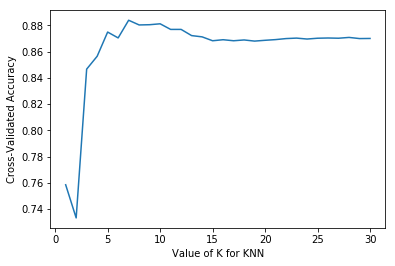

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X_dtm, y, cv=10, scoring='accuracy').mean())

0.882391393216


In [70]:
# More efficient parameter tuning using GridSearchCV

from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [71]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [72]:

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [73]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [74]:
# fit the grid with data
grid.fit(X_dtm, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [75]:

# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.75857, std: 0.13148, params: {'n_neighbors': 1},
 mean: 0.73330, std: 0.13336, params: {'n_neighbors': 2},
 mean: 0.84668, std: 0.09282, params: {'n_neighbors': 3},
 mean: 0.85647, std: 0.08317, params: {'n_neighbors': 4},
 mean: 0.87491, std: 0.07219, params: {'n_neighbors': 5},
 mean: 0.87045, std: 0.07768, params: {'n_neighbors': 6},
 mean: 0.88392, std: 0.07096, params: {'n_neighbors': 7},
 mean: 0.88033, std: 0.07403, params: {'n_neighbors': 8},
 mean: 0.88051, std: 0.06797, params: {'n_neighbors': 9},
 mean: 0.88121, std: 0.06958, params: {'n_neighbors': 10},
 mean: 0.87692, std: 0.06184, params: {'n_neighbors': 11},
 mean: 0.87692, std: 0.06377, params: {'n_neighbors': 12},
 mean: 0.87220, std: 0.05929, params: {'n_neighbors': 13},
 mean: 0.87124, std: 0.06048, params: {'n_neighbors': 14},
 mean: 0.86827, std: 0.05813, params: {'n_neighbors': 15},
 mean: 0.86906, std: 0.05791, params: {'n_neighbors': 16},
 mean: 0.86827, std: 0.05775, params: {'n_neighbors': 17},
 mean:

In [76]:

# examine the first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 0.85676856  0.91004367  0.88558952  0.83318777  0.86200873  0.66404199
  0.56255468  0.60367454  0.58005249  0.82677165]
0.7585664335664336


In [77]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.7585664335664336, 0.7333041958041958, 0.8466783216783217, 0.8564685314685314, 0.8749125874125874, 0.8704545454545455, 0.8839160839160839, 0.8803321678321678, 0.880506993006993, 0.8812062937062937, 0.8769230769230769, 0.8769230769230769, 0.8722027972027973, 0.8712412587412588, 0.8682692307692308, 0.8690559440559441, 0.8682692307692308, 0.8688811188811189, 0.868006993006993, 0.8686188811188811, 0.8691433566433566, 0.8699300699300699, 0.8702797202797202, 0.8695804195804195, 0.8701923076923077, 0.8703671328671329, 0.8701923076923077, 0.8708041958041958, 0.8699300699300699, 0.8700174825174826]


Text(0,0.5,'Cross-Validated Accuracy')

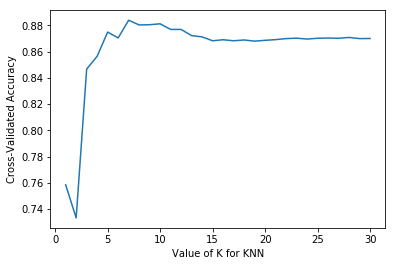

In [78]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Classifier --- Accuracy %
              
#### knn                   ---                         87.48        
#### logistic regression --- 88.23   
#### Naive Bayes               ---          92.02     